# Comprendre le chômage en France 

Vous êtes vous déjà demandé d'où sortaient les chiffres qu'annoncent les politiques ou les media lorsqu'ils parlent de chômage. Etant un sujet d'intérêt dans les pays occidents, tentons de comprendre ce qu'ils se passent en termes de chômages en France. Pour cela, nous avons récupéré des données sur [data.gouv](https://www.insee.fr/fr/statistiques/3555153#consulter). Elles représentent les données du chômage en France en 2017



## Documentation du dataset 

Regarder la documentation du dataset [ici](https://www.insee.fr/fr/statistiques/3555153#documentation)

* Allez sur le lien suivant : [Dataset](https://www.insee.fr/fr/statistiques/3555153#consulter) et téléchargez le petit dataset de 9Mo. 

* En utilisant la commande `!unzip filename.zip` dézippez le fichier que vous avez téléchargé 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


unzip:  cannot find or open /content/drive/My, /content/drive/My.zip or /content/drive/My.ZIP.


Archive:  fd_eec17_dbase.zip
  inflating: fdeec17.dbf             
  inflating: varlist.dbf             
  inflating: varmod.dbf              


* Importez les librairies 
  * pandas 
  * numpy 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt

* Nous allons avoir besoin d'installer une librairie sur notre notebook pour pouvoir lire les fichiers. Utilisez la commande suivante : 

`!pip install simpledbf`

In [4]:
!pip install simpledbf

  Created wheel for simpledbf: filename=simpledbf-0.2.6-cp36-none-any.whl size=13793 sha256=fc39c5918e27cddd01f89c3aaf147e7b31c41625c9d99f90d04891938036a606
  Stored in directory: /root/.cache/pip/wheels/72/dd/df/cdfb970a508ef9750ebb4b6e035a3410c3d62b5a6a91d2aafc
Successfully built simpledbf


* Appliquez ensuite le code suivant : 

```
from simpledbf import Dbf5
dataset = Dbf5("fdeec17.dbf").to_dataframe()
dataset.head()
```

In [10]:
from simpledbf import Dbf5
dataset = Dbf5("/content/drive/My Drive/fdeec17.dbf").to_dataframe()
dataset.head()

,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,NFRRED,SEXE,ACTEU,ACTEU6,ACTIF,ACTOP,AIDFAM,ANCCHOM,ANCINACT,CONTACT,CREACCP,DEM,DISPOC,GARDEB,HALOR,INSCONT,MRA,MRB,MRBBIS,MRC,MRD,MRDBIS,MRE,MREC,MRF,MRG,MRGBIS,MRH,MRI,MRJ,MRK,...,NAFG088UN,PUB3FP,QPRC,STC,CONTRA,RDET,STAT2,STATOEP,STATUT,STATUTR,TITC,CSTMN,CSTPLC,DISPPLC,DUHAB,GARDEA,HHC6,HORAIC,RAISON,RAISTP,STMN,STPLC,TPPRED,TXTPPRED,ANCENTR4,SITANT,AAC,CSA,NAFANT,NAFANTG004,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,2017,1,1,1,2,50,50,2,1,1,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86,3,4,3,1,NaN,2,45,35,5,NaN,NaN,NaN,NaN,6,NaN,4,1,NaN,NaN,2,2,1,NaN,4,1,NaN,NaN,NaN,NaN,30,52,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,2017,1,1,1,2,15,15,2,2,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,4,1,3,2,2,2,33,33,4,NaN,NaN,NaN,NaN,5,NaN,3,2,NaN,NaN,2,2,1,NaN,1,1,NaN,NaN,NaN,NaN,42,52,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2017,1,1,1,2,15,15,2,2,1,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65,4,3,3,1,NaN,2,35,35,5,NaN,NaN,NaN,NaN,6,NaN,4,2,NaN,NaN,2,2,1,NaN,1,4,NaN,NaN,NaN,NaN,31,52,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,2017,3,1,1,2,50,50,2,1,1,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86,3,4,3,1,NaN,2,45,35,5,NaN,NaN,NaN,NaN,6,NaN,4,1,NaN,NaN,2,2,1,NaN,4,1,NaN,NaN,NaN,NaN,30,52,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,2017,3,1,1,2,15,15,2,2,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,4,1,3,2,2,2,33,33,4,NaN,NaN,NaN,NaN,5,NaN,3,2,NaN,NaN,2,2,1,NaN,1,1,NaN,NaN,NaN,NaN,42,52,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,NFRRED,SEXE,ACTEU,ACTEU6,ACTIF,ACTOP,AIDFAM,ANCCHOM,ANCINACT,CONTACT,CREACCP,DEM,DISPOC,GARDEB,HALOR,INSCONT,MRA,MRB,MRBBIS,MRC,MRD,MRDBIS,MRE,MREC,MRF,MRG,MRGBIS,MRH,MRI,MRJ,MRK,...,NAFG088UN,PUB3FP,QPRC,STC,CONTRA,RDET,STAT2,STATOEP,STATUT,STATUTR,TITC,CSTMN,CSTPLC,DISPPLC,DUHAB,GARDEA,HHC6,HORAIC,RAISON,RAISTP,STMN,STPLC,TPPRED,TXTPPRED,ANCENTR4,SITANT,AAC,CSA,NAFANT,NAFANTG004,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,2017,1,1,1,2,50,50,2,1,1,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86,3,4,3,1,NaN,2,45,35,5,NaN,NaN,NaN,NaN,6,NaN,4,1,NaN,NaN,2,2,1,NaN,4,1,NaN,NaN,NaN,NaN,30,52,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,2017,1,1,1,2,15,15,2,2,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,4,1,3,2,2,2,33,33,4,NaN,NaN,NaN,NaN,5,NaN,3,2,NaN,NaN,2,2,1,NaN,1,1,NaN,NaN,NaN,NaN,42,52,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2017,1,1,1,2,15,15,2,2,1,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65,4,3,3,1,NaN,2,35,35,5,NaN,NaN,NaN,NaN,6,NaN,4,2,NaN,NaN,2,2,1,NaN,1,4,NaN,NaN,NaN,NaN,31,52,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,2017,3,1,1,2,50,50,2,1,1,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86,3,4,3,1,NaN,2,45,35,5,NaN,NaN,NaN,NaN,6,NaN,4,1,NaN,NaN,2,2,1,NaN,4,1,NaN,NaN,NaN,NaN,30,52,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,2017,3,1,1,2,15,15,2,2,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,4,1,3,2,2,2,33,33,4,NaN,NaN,NaN,NaN,5,NaN,3,2,NaN,NaN,2,2,1,NaN,1,1,NaN,NaN,NaN,NaN,42,52,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


* Importez `matplotlib`

In [41]:
sizes = dataset.groupby('ACTEU').size()
sizes

ACTEU
1    198054
2     21864
3    207520
dtype: int64

* En faisant un [pie-chart](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html), montrez la part de chômeurs, d'inactifs et d'actifs occupés en France à partir de la variable ACTEU. Faites attention de faire apparaitre : 

  * Le pourcentage de chaque partie 
  * Une légende 

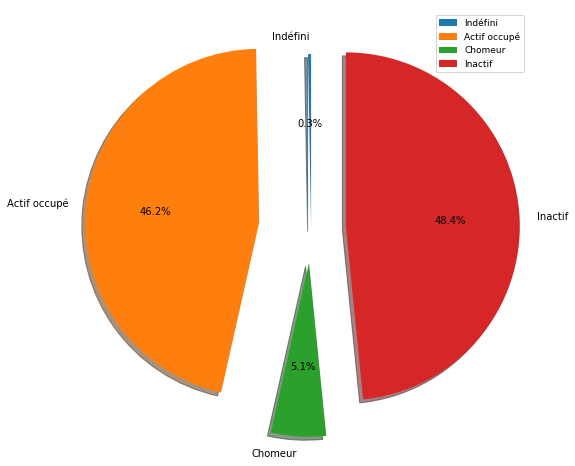

In [65]:
import matplotlib.pyplot as plt

dataset.ACTEU = dataset.ACTEU.fillna(0)

# Création de données pour un Pie Chart
labels = 'Indéfini','Actif occupé', 'Chomeur', 'Inactif'
sizes = dataset.groupby('ACTEU').size().tolist()
explode = (0, 0.3, 0.2, 0.2)
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.pie(sizes,labels=labels, autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=90,)
plt.legend(labels,loc=1, prop={'size': 9})
plt.show()


Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: ACTEU, dtype: int64

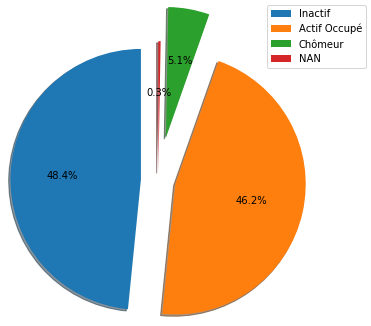

---> Le chiffre du chômage semble bas et, si on regarde l'explication des *inactifs*, celle-ci semble inclure beaucoup de monde (étudiants, personne ne cherchant pas d'emploi etc.)

* Faites le même graphique sur la variable ACTEU6 qui est plus précise sur le type d'actifs 

In [43]:
dataset.groupby('ACTEU6').size().tolist()

[198054, 20854, 1010, 34599, 172921]

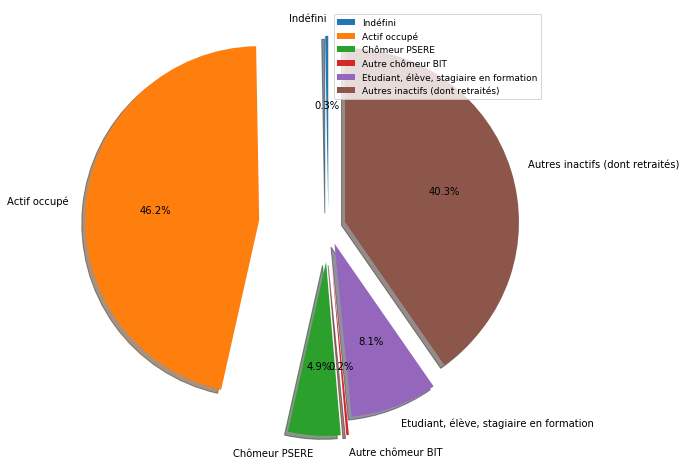

In [68]:
# Création de données pour un Pie Chart
dataset.ACTEU6 = dataset.ACTEU6.fillna(0)
labels = 'Indéfini','Actif occupé', 'Chômeur PSERE', 'Autre chômeur BIT', 'Etudiant, élève, stagiaire en formation','Autres inactifs (dont retraités)'
sizes = dataset.groupby('ACTEU6').size().tolist()
fig1, ax1 = plt.subplots(figsize=(10, 8))
explode = (0.1, 0.4, 0.2, 0.2, 0.1, 0.1)
plt.pie(sizes,labels=labels, autopct='%1.1f%%',explode = explode, 
        shadow=True, startangle=90)
plt.legend(labels,loc=1, prop={'size': 9})
plt.show()

Actif Occupé                               198054
Autres inactifs (dont retraité)            172921
Etudiant, élève, stagiaire en formation     34599
Chômeur PSERE                               20854
NAN                                          1204
Autre Chômeur BIT                            1010
Name: ACTEU6, dtype: int64

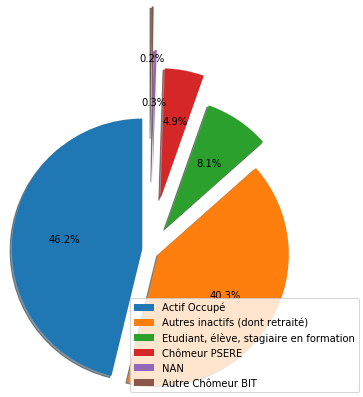

* En créant un [stacked bar chart](https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html), comparez :

  * le rapport *chômeurs* / *Actifs occupés* 
  * Le rapport *chômeurs* / *Actifs occupés + Inactifs*

In [0]:
# On recréé les données dont on a besoin 


Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: ACTEU, dtype: int64

In [75]:
total1 = int(dataset.groupby('ACTEU').size().tolist()[1])+int(dataset.groupby('ACTEU').size().tolist()[2])
rapport1 = [int(dataset.groupby('ACTEU').size().tolist()[2])/total1,int(dataset.groupby('ACTEU').size().tolist()[1])/total1]
rapport1

[0.09941887430769651, 0.9005811256923035]

In [0]:
# On créé le rapport chômeurs / Actifs occupés 



Rapports de chômeurs
 [0.11039413493289708, 0.05390878113488537]


In [76]:
total2 = int(dataset.groupby('ACTEU').size().tolist()[1])+int(dataset.groupby('ACTEU').size().tolist()[2])+int(dataset.groupby('ACTEU').size().tolist()[3])
rapport2 = [int(dataset.groupby('ACTEU').size().tolist()[2])/total2,(int(dataset.groupby('ACTEU').size().tolist()[1])+int(dataset.groupby('ACTEU').size().tolist()[3]))/total2]
rapport2

[0.05115127808009583, 0.9488487219199042]

In [0]:
# On créé le rapport Chômeurs / (Actifs occupés + Inactifs)


Rapports d'actifs
 [0.88960587 0.94609122]


In [0]:
legend = ['Chômeurs / Actifs Occupés', 'Chômeurs / Actifs + Inactifs']

In [0]:
# On créé une liste _legend_ qui contiendra les deux rapports : 
## chômeurs / Actifs occupés
## Chômeurs / (Actifs occupés + Inactifs)


['Chômeurs / Actifs Occupés', 'Chômeurs / Actifs + Inactifs']

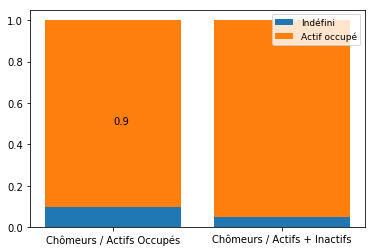

In [90]:
names = legend
values_1 = [rapport1[0], rapport2[0]]
values_2 = [rapport1[1], rapport2[1]]

# Création du Barplot
plt.bar(names, values_1)
plt.bar(names, values_2, bottom=values_1)
plt.text(names[0], 0.5, round(rapport1[1],2))
plt.legend(labels,loc=1, prop={'size': 9})
plt.show()

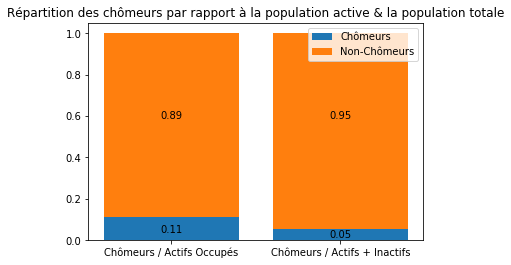

In [0]:
# On créé deux bar charts qui seront superposés l'un à l'autre
## N'oubliez pas d'utiliser deux ax.bar()
## Pour créer les légendes, on peut utiliser ax1.text()
## Pour créer un titre, on peut utiliser ax1.set_title()




Il semblerait que nous étions 11% de chômeurs parmi la population active (travailleuse) en France en 2017 selon le BIT

* En créant à nouveau un [*bar chart*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) , regardez cette fois la répartition de l'ancienneté du chômage. Le nom de la variable est ANCCHOM

In [98]:
dataset.ANCCHOM = dataset.ANCCHOM.fillna(0)
dataset.ANCCHOM.drop(0)
listCat = dataset.groupby('ANCCHOM').size().tolist()
listCat.pop(0)
listCat

[902, 3270, 3193, 3648, 3398, 1132, 2289, 3906]

In [0]:
# On renomme les catégories de notre colonne 


NAN                                 406904
3 ans ou plus                         3906
De 6 mois à moins d'un an             3648
De 1 an à moins d'un an et demi       3398
De 1 mois à moins de 3 mois           3270
De 3 mois à moins de 6 mois           3193
De 2 ans à moins de 3 ans             2289
De 1 an et demi à moins de 2 ans      1132
Moins d'un mois                        902
Name: ANCCHOM, dtype: int64

In [0]:
legend = ["Idéfini","Moins d'un mois",
"De 1 mois à moins de 3 mois",
"De 3 mois à moins de 6 mois",
"De 6 mois à moins d'un an",
"De 1 an à moins d'un an et demi",
"De 1 an et demi à moins de 2 ans",
"De 2 ans à moins de 3 ans",
"3 ans ou plus"]

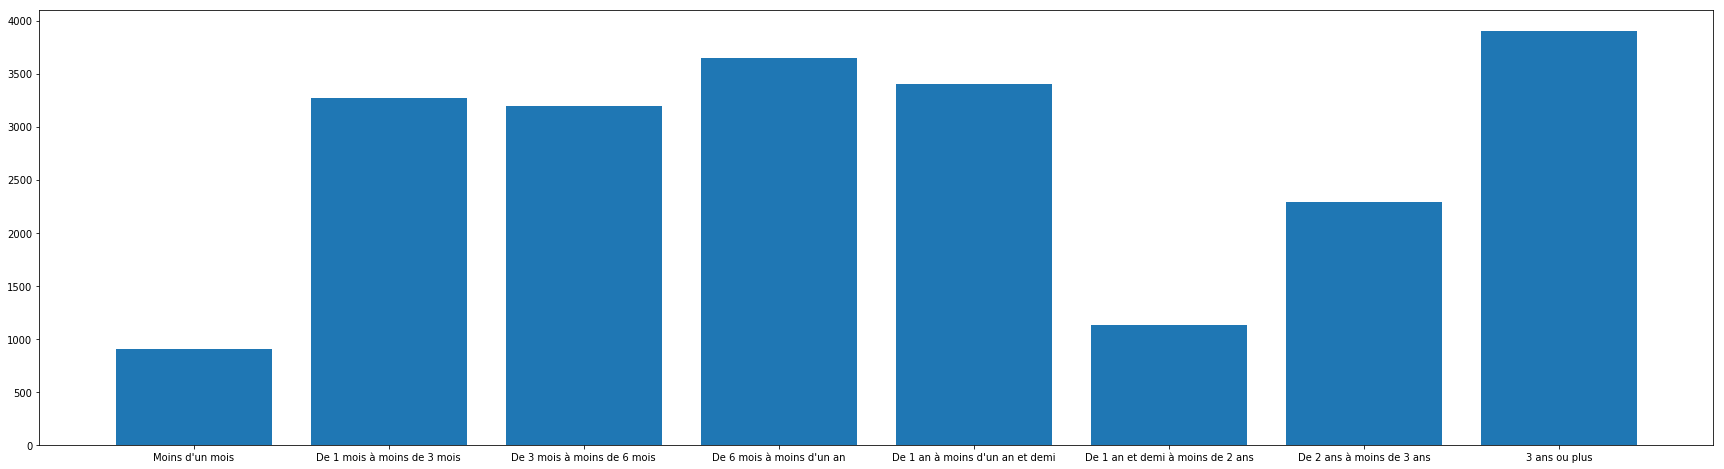

In [100]:
# Création de données 
names = legend
values = listCat
fig1, ax1 = plt.subplots(figsize=(30, 8))
# Création du Barplot
plt.bar(names, values)
plt.show()

<BarContainer object of 8 artists>

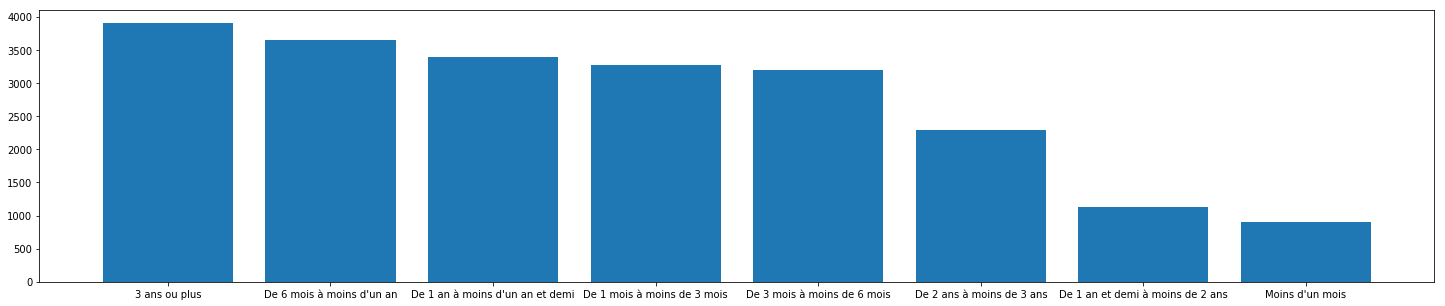

In [0]:
# On créé maintenant notre bar chart


* La répartition se voit assez mal sur le *bar chart*, tentez de le refaire sur un *pie chart* 

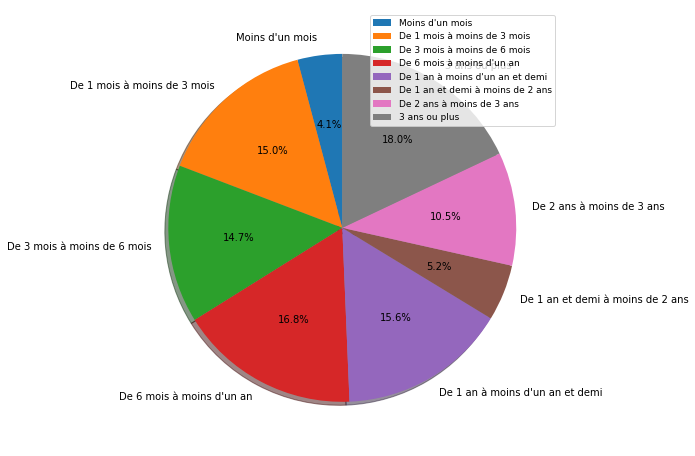

In [101]:
labels = legend
sizes = listCat
fig1, ax1 = plt.subplots(figsize=(10, 8))
#explode = (0.1, 0.4, 0.2, 0.2, 0.1, 0.1)
plt.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(labels,loc=1, prop={'size': 9})
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


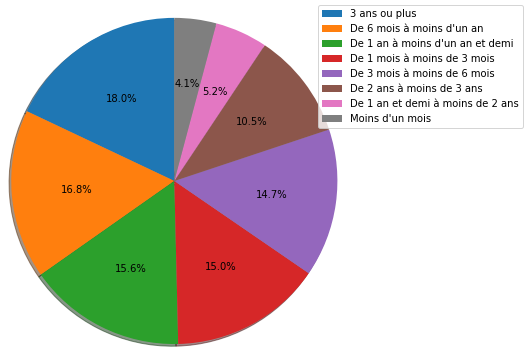

* Il serait intéressant de voir la répartition des personnes inscrites à Pôle Emploi ou dans un organisme de placement parmi ces personnes au chômage. Regardez cette répartition grâce à la colonne CONTACT 
  * Enlevez directement les NaN de votre graphique

In [103]:
dataset.groupby("CONTACT").size().tolist()

[13144, 15984]

In [0]:
# On renomme les catégories de notre colonne 


NAN    399514
Non     15984
Oui     13144
Name: CONTACT, dtype: int64

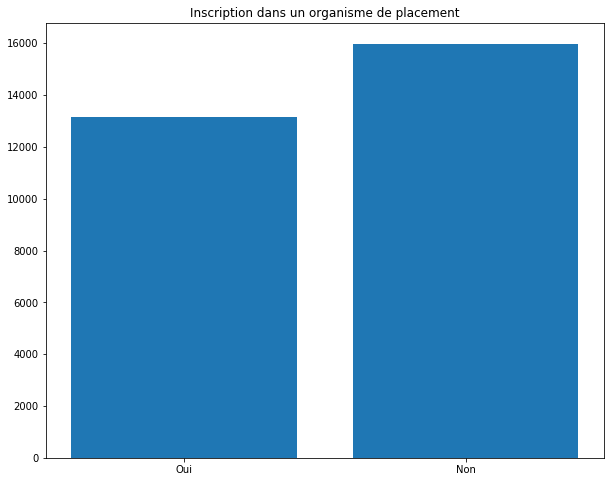

In [106]:
# Création de données 
names = "Oui", "Non"
values = dataset.groupby("CONTACT").size().tolist()

fig1, ax1 = plt.subplots(figsize=(10, 8))
# Création du Barplot
plt.bar(names, values)
plt.title("Inscription dans un organisme de placement")
plt.show()

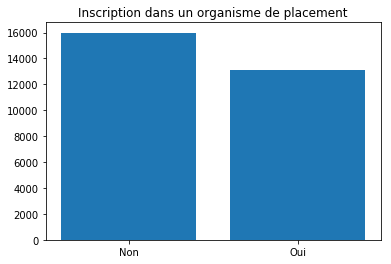

In [0]:
# On créé notre graphique 


* Regardons ce qui pousse les français à changer d'emploi, grâce à la colonne CREACCP, crééz un bar chart horizontale qui va permettre de connaitre les principales raisons de changement d'emploi des français. 

In [0]:
# On renomme les catégories de notre colonne 


Doit ou veut déménager                                                                   216
Veut s'installer à son compte                                                            354
Désire diminuer son temps de transport                                                   598
Désire un travail avec un rythme horaire plus adapté ou plus modulable                  1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles          1223
Veut changer de métier ou de secteur                                                    1392
Veut travailler plus d'heures                                                           1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)      1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé             1820
Veut un emploi plus stable (CDI)                                                        2462
Désire un emploi plus intéressant                                     

In [0]:
# Nous avons besoin de faire une répartition par pourcentage
# Calculons donc la répartition totale des répondants 


21707


In [0]:
# Calculons maintenant la répartition de chacune des réponses 


[1.0, 1.63, 2.75, 5.08, 5.63, 6.41, 6.47, 7.29, 8.38, 11.34, 12.8, 31.21]

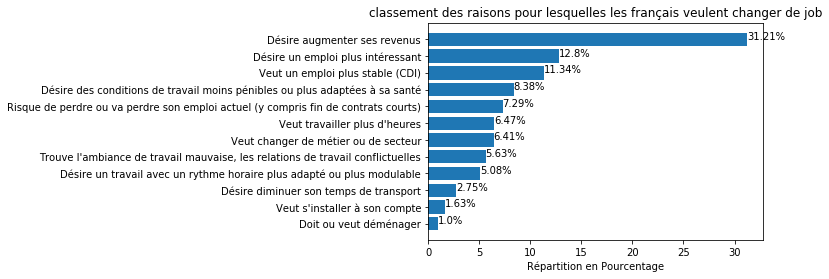

In [0]:
# Créons maintenant le graphique 


* Finissons cet exercice en regardant la distribution du nombre d'heures souhaitées pour les personnes qui cherchent un travail à temps partiel. Pour cela, utilisez la colonne HREC. 

  * Essayez tout d'abord de créer simplement un histogramme sans la fonction de densité 
  * Pour créer la fonction de densité, vous devrez utiliser la formule suivante : 
      ```y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))```
     
     où *mu* est la moyenne de la distribution et *sigma* est l'écart-type.  Vous pouvez vous aider de ce tutoriel [histogramme with Density](https://matplotlib.org/3.1.1/gallery/statistics/histogram_features.html)

In [0]:
hrec = dataset.HREC.dropna()
hrec

In [0]:
names = hrec
values = dataset.groupby("CONTACT").size().tolist()

fig1, ax1 = plt.subplots(figsize=(10, 8))
# Création du Barplot
plt.bar(names, values)
plt.title("Histogram of IQ")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram of IQ: $\\mu=22.38$, $\\sigma=8.52$')

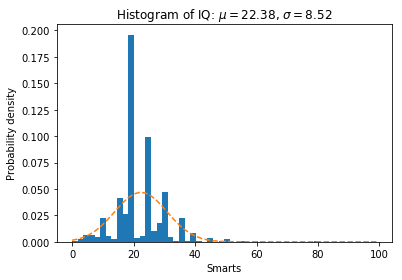